In [10]:
#7.5cm by 3cm
# import the necessary packages
from scipy.spatial import distance as dist
#import numpy as np
#import cv2
from __future__ import print_function
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

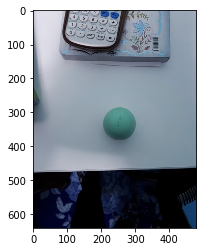

In [24]:
#results were decent with well lit images, how about dimmer ones
#frame = cv2.imread("light_green.jpg", 1)
#results for this were also fine
frame = cv2.imread("dark_green.jpg", 1)
plt.imshow(frame)

In [26]:
#convert it to the HSV
blurred = cv2.GaussianBlur(frame, (11, 11), 0)
pic = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# construct a mask for the color "green", then perform
# a series of dilations and erosions to remove any small
# blobs left in the mask
#frame = cv2.resize(pic, (400, 600))

greenLower = np.array([29, 86, 6],np.uint8)
greenUpper = np.array([70, 255, 255], np.uint8)

mask = cv2.inRange(pic, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

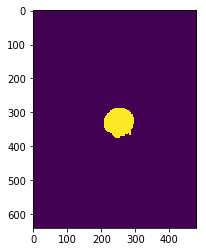

In [27]:
plt.imshow(mask)

d
(251, 329)
cont


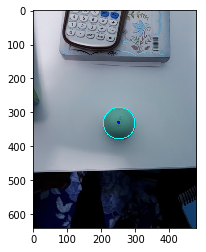

In [28]:
# find contours in the mask and initialize the current
# (x, y) center of the ball
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None

# only proceed if at least one contour was found
if len(cnts) > 0:
    print("d")
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
    print(center)
    # only proceed if the radius meets a minimum size
    if radius > 10:
        # draw the circle and centroid on the frame,
        # then update the list of tracked points
        cv2.circle(frame, (int(x), int(y)), int(radius),
            (0, 255, 255), 2)
        cv2.circle(frame, center, 5, (0,0,255), -1)
    print("cont")
    
#Add distance code here, put in a loop, 
#test here first, before passing everything to the pi
plt.imshow(frame)   